## Simulation und Modellierung WS16/17 - Uebung 05

### Aufgabe 1 : verallgemeinerte Fibonacci Zahlen

Schreiben Sie eine Funktion `AllgFib(F0=1,F1=1,a=1,b=1,N=3)`, welche die ersten `N` Folgeglieder der verallgemeinerten Fibonaccifolge

$$
    F_{n+1} = a F_n + b F_{n-1}
$$

mit den Anfangsbedingungen $F_0=$ `F0` und $F_1=$ `F1` berechnet und als Liste ausgibt. (Achtung : Die Definition in der Vorlesung war etwas anders)

Schreiben Sie eine Funktion `my_sqrt(x)`, welche mit Hilfe der verallgemeinerten Fibonacci Zahlen die Wurzel aus `x` bis auf Maschinengenauigkeit ausrechnet. Berechnen Sie $\sqrt{2}$ mit dieser Funktion. 

*Hinweis :* Iterieren Sie die Fibonacci Folge schrittweise bis sich das Verhaeltnis aufeinanderfolgender Zahlen nicht mehr aendert.

In [22]:
def AllgFib(F0=1,F1=1,a=1,b=1,N=3):#erstellt einer Liste mit den Fibonacci Zahlen. N gibt an wie viele.
    F=[] #macht F zu einer leeren Liste.
    F.append(F0) #Fügt F0 in die Liste F ein.
    F.append(F1) #Hängt F1 an die Liste F ran.
    for i in range(2,N): #Lässt i nacheinander alle ganzen Zahlen von 2 bis N-1 annehmen.
        F.append(None) #Fügt ein leeres Element in die Liste ein, damit der Index immer im definierten Bereich bleibt.
        F[i]=a*F[i-1]+b*F[i-2] #Das ist die Formel der Fibonacci Zahlen, in die i eingesetzt wird.
    return(F) #Gibt die Liste F zurück
   
#Beispiele
print(AllgFib(N=19))
print(AllgFib(N=4))
print(AllgFib(N=13))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]
[1, 1, 2, 3]
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]


In [27]:
def Betrag(x): #Sorgt dafür, dass x immer positiv ist.
    if x<0:
        x=-x #Sobald x negativ ist, wird x positiv gemacht.
    return(x) #Gibt den x-Wert zurück-
def my_sqrt(x): #Zieht die wurzel aus x.
    Genauigkeit = False #Ändert sich im Laufe der nächsten while-Schleife zu False, wenn die Genauigkeit von 2 aufeinadnerfolgenden Zahlen erreicht ist.
    Fa=1
    Fb=1 #Legt die Anfangswerte bei 1 fest.
    Maschinengenauigkeit=2**(-24) #Definiert die Maschinengenauigkeit.
    while Genauigkeit!=True: #Solange die Funktion Genauigkeit ungleich True ist, läuft die while-Schleife.
        F=AllgFib(F0=Fa, F1=Fb, a=2, b=x-1) #F ist eine Liste, welche 3 aufeinanderfolgende Fibonaccizahlen enthält.
        if (Betrag(F[2]/F[2-1]-F[2-1]/F[2-2]))<Maschinengenauigkeit: #Greift, wenn die Betragsfunktion kleiner als die Funktion der Maschinengenauigkeit ist.
            Genauigkeit=True #Setzt die Funktion Genauigkeit auf True, was die while-Schleife stoppt.
        else: #Ist die Betragsfunktion größer als die Funktion der Maschinengenauigkeit, läuft die wihle-Schleife weiter.
            Fa=F[1];Fb=F[2] #Die Stelle F[2] in der nächsten Liste F,der Größe 3, besitzt durch diese Anweisung die nächst höhere Fibonaccizahl im Vergleich zu F[2] in dieser Liste F.
    lim=F[2]/F[2-1] #Berechnet den Grenzwert der Folge Fn/Fn-1, was näherungsweise gleichzusetzen ist mit 1+ der Wurzel aus x.
    return(lim-1) #Gibt den Grenzwert zurück und gleicht das +1 aus.       
print ("Ergebnis   von mir:", my_sqrt(2))
print ("Ergebnis von Numpy:", np.sqrt(2))  

Ergebnis   von mir: 1.4142135605326258
Ergebnis von Numpy: 1.41421356237


### Aufgabe 2 : Collatz-Problem

Wir betrachten die folgende Abbildung ueber den *positiven* natuerlichen Zahlen

$$
    f(n) = \left\lbrace \begin{array}{ll}
                            {}n/2 \qquad &,\textrm{falls }n\textrm{ gerade} \\
                            3n+1\qquad &,\textrm{falls }n\textrm{ ungerade}
                        \end{array}
           \right.
$$

sowie die natuerliche Zahl $\tau(n)$ welche angibt, wie of $f$ iteriert werden muss, bis man die Zahl 1 erreicht, d.h.

$$
    \left(f\circ\right)^{\tau(n)}(n) = 1
$$

Schreiben Sie eine Funktion `tau(n)`, welche diese Zahl berechnet. Berechnen Sie eine Liste `L` der Werte $\tau(n)$ fuer die ersten `2**20` positiven natuerlichen Zahlen und plotten diese mit

```python
    from pylab import *
    plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
    show()
```

<a href="https://en.wikipedia.org/wiki/Collatz_conjecture">Collatz-Problem @ Wikipedia</a><br>
Collatz-Problem @ xkcd : <img src="http://imgs.xkcd.com/comics/collatz_conjecture.png">

In [54]:
def tau(n): #Gibt an, wie oft man die oben genannte Formel auf die eingegebene Zahl anwenden muss, um auf 1 zu kommen.
    i=0 #setzt den Startpunkt von i.
    if n<0 or n==0 or n%1!=0: #Reagiert auf negative Zahlen, die Null und auf Kommazahlen.
         return print("Eingebene Zahl ist keine positive ganze Zahl.") #Gibt die Fehlermeldung aus, weil unsere Funktion nur mit natürlichen Zahlen funktioniert.
    else: #Reagiert bei positiven natürlichen Zahlen
        while n!=1 and i!=1000: #Diese Schleife läuft solange, bis n den Wert 1 annimmt und stoppt, wenn i den Wert 1000 annimmt.
            if n%2==0: #Vorraussetzung das n gerade ist.
                n=n/2 #Das ist die Rechenoperation aus der Formel, wenn n gerade ist
            else:
                n=3*n+1 #Das ist die Rechenoperation aus der Formel, wenn n ungerade.
            i=i+1 #Startet die Schleife neu mit einem neuen i.
        return(i) #Gibt an wie oft die Schleife durchgelaufen ist.


In [58]:
#Beispiele
print(tau(374738483758))
print(tau(15))
print(tau(66))

230
17
27


In [65]:
L=[tau(x) for x in range(1,2**20)] #Packt alle Werte von 1 bis 2**20-1 in tau und das Ergebnis in eine Liste.

<IPython.core.display.Javascript object>


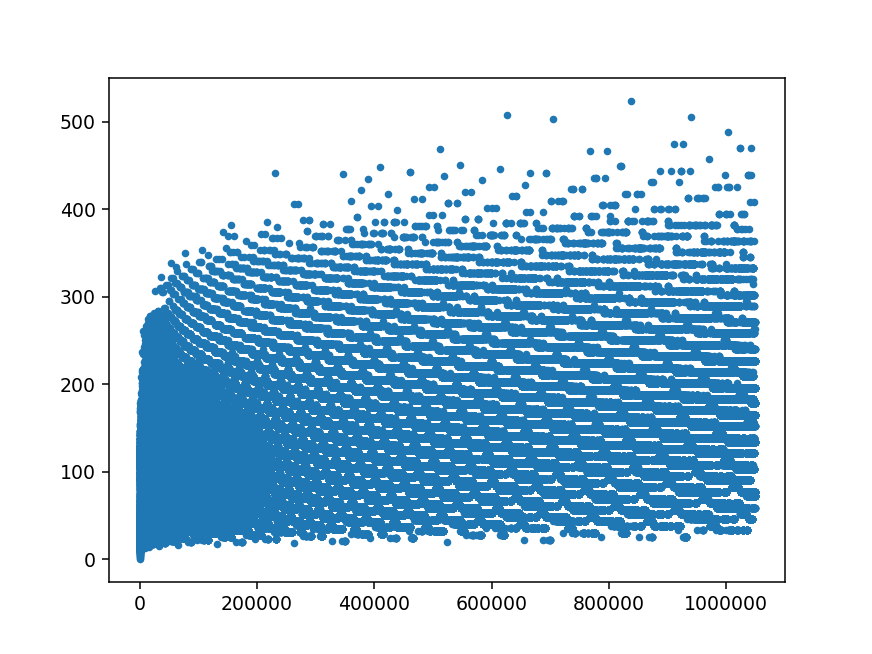

In [68]:
from pylab import *
%matplotlib notebook
plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
show()

### Zusatzaufgabe (+10%):

- Wie lautet die Taylorentwicklung von $f(x) = \sqrt{1+x}$ ?
- Schreiben Sie eine Funktion `sqrt1px(x,eps=0)`, welche die Taylorreihe bis auf eine gegebene Genauigkeit $\varepsilon$, bzw. bis zur Konvergenz $\varepsilon=0$ berechnet.
- berechnen Sie $\sqrt{2}$ als `sqrt1px(1.0)` bzw. `1.0/sqrt1px(-0.5)`.